In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from dataset import TrainData

In [2]:
r = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_red.png", 0)
g = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_green.png", 0)
b = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png", 0)
y = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_yellow.png", 0)

In [3]:
rgb = np.stack([r, g, b], axis=2)

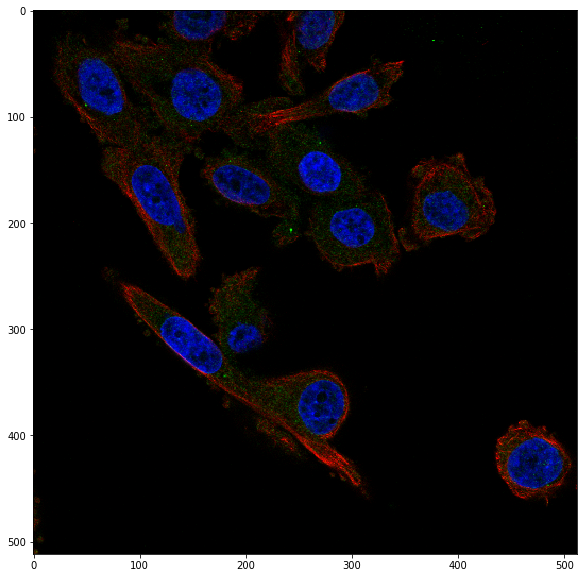

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb, cmap="gray")

In [5]:
train_data = TrainData("../../hpa")

Time to prepare train data: 0:00:00.124120


In [6]:
train_data.df.describe()

,Target
count,31072
unique,582
top,"(0,)"
freq,2414


In [7]:
train_data.df.head()

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"(16, 0)"
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"(7, 1, 2, 0)"
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,"(5,)"
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,"(1,)"
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,"(18,)"


In [8]:
submission_df = pd.read_csv(
    "./submission.csv",
    index_col="Id",
    converters={"Predicted": lambda target: [] if len(str(target)) == 0 else tuple(map(int, str(target).split(" ")))}
)

submission_df.rename(columns={"Predicted": "Target"}, inplace=True)

In [9]:
submission_df.head()

,Target
Id,
00008af0-bad0-11e8-b2b8-ac1f6b6435d0,"(0, 2)"
0000a892-bacf-11e8-b2b8-ac1f6b6435d0,"(5,)"
0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,"(0, 2, 25)"
0008baca-bad7-11e8-b2b9-ac1f6b6435d0,"(0,)"
000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,"(0, 25)"


In [10]:
def count_categories(df):
    category_count = np.zeros(28)
    for t in df.Target:
        for c in t:
            category_count[c] += 1
    return category_count


def plot_category_counts(df):
    category_count = count_categories(df)
    plt.bar(range(len(category_count)), category_count)
    print(category_count.tolist())
    print(min(category_count))
    print(max(category_count))

[12885.0, 1254.0, 3621.0, 1561.0, 1858.0, 2513.0, 1008.0, 2822.0, 53.0, 45.0, 28.0, 1093.0, 688.0, 537.0, 1066.0, 21.0, 530.0, 210.0, 902.0, 1482.0, 172.0, 3777.0, 802.0, 2965.0, 322.0, 8228.0, 328.0, 11.0]
11.0
12885.0


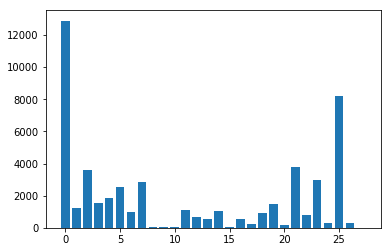

In [11]:
plot_category_counts(train_data.df)

[6232.0, 288.0, 1288.0, 353.0, 453.0, 719.0, 269.0, 900.0, 0.0, 0.0, 0.0, 209.0, 92.0, 94.0, 353.0, 0.0, 8.0, 22.0, 55.0, 194.0, 1.0, 2440.0, 130.0, 1226.0, 38.0, 5563.0, 0.0, 0.0]
0.0
6232.0


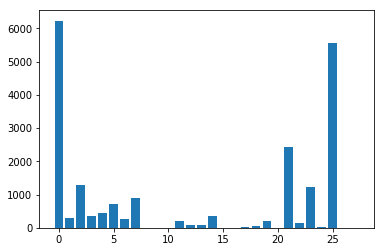

In [12]:
plot_category_counts(submission_df)

[10286.0, 1005.0, 2905.0, 1250.0, 1477.0, 2031.0, 810.0, 2220.0, 43.0, 33.0, 21.0, 898.0, 555.0, 427.0, 847.0, 15.0, 416.0, 163.0, 717.0, 1197.0, 139.0, 3018.0, 632.0, 2380.0, 278.0, 6626.0, 269.0, 9.0]
9.0
10286.0


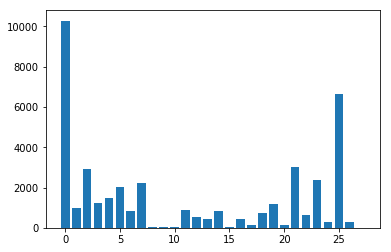

In [13]:
plot_category_counts(train_data.train_set_df)

[2599.0, 249.0, 716.0, 311.0, 381.0, 482.0, 198.0, 602.0, 10.0, 12.0, 7.0, 195.0, 133.0, 110.0, 219.0, 6.0, 114.0, 47.0, 185.0, 285.0, 33.0, 759.0, 170.0, 585.0, 44.0, 1602.0, 59.0, 2.0]
2.0
2599.0


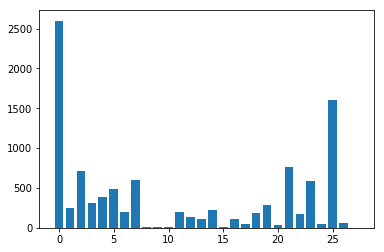

In [14]:
plot_category_counts(train_data.val_set_df)

In [15]:
category_count = count_categories(train_data.df)
category_weights = [np.median(category_count) / cc for cc in category_count]
print(category_weights)
print(min(category_weights))
print(max(category_weights))

[0.07411719053162592, 0.7615629984051037, 0.26373929853631595, 0.6117873158231902, 0.5139935414424112, 0.3800238758456029, 0.9474206349206349, 0.33841247342310415, 18.0188679245283, 21.22222222222222, 34.107142857142854, 0.8737419945105215, 1.3880813953488371, 1.7783985102420856, 0.8958724202626641, 45.476190476190474, 1.8018867924528301, 4.5476190476190474, 1.058758314855876, 0.6443994601889339, 5.5523255813953485, 0.25284617421233785, 1.1907730673316708, 0.3220910623946037, 2.9658385093167703, 0.11606708799222168, 2.9115853658536586, 86.81818181818181]
0.07411719053162592
86.81818181818181


In [16]:
def calculate_category_lenghts(df):
    category_len = {}
    for t in df.Target:
        category_len[len(t)] = category_len.setdefault(len(t), 0) + 1
    print(category_len)
    return category_len

In [17]:
calculate_category_lenghts(train_data.df)
calculate_category_lenghts(train_data.train_set_df)
calculate_category_lenghts(train_data.val_set_df)

{2: 12485, 4: 299, 1: 15126, 3: 3160, 5: 2}
{2: 10034, 4: 246, 1: 12060, 3: 2515, 5: 2}
{2: 2451, 1: 3066, 3: 645, 4: 53}


{2: 2451, 1: 3066, 3: 645, 4: 53}